## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
#Create a path to where the data is stored.
path = r'/Users/vicky/OneDrive/文件/careerfoundry/Machine Learning with Python/Datasets'

In [3]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

In [4]:
#Read in the Cleaned European weather data.
climate = pd.read_csv(os.path.join(path,'climate_nodate_cleaned.csv'), index_col=0)

In [5]:
climate

BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
0                      7                    0.32            0.85   
1                      6                    0.36            0.84   
2                      8                    0.18            0.90   
3                      3                    0.58            0.92   
4                      6                    0.65            0.95   
...                  ...                     ...             ...   
22945                  1                    1.34            0.79   
22946                  6                    1.34            0.77   
22947                  4                    1.34            0.76   
22948                  5                    1.34            0.80   
22949                  5                    1.34            0.84   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
0                     0.09          1.0180             0.7            10.9   
1                     1.05          1.0180             1.1            10.1   
2                     0.30          1.0180             0.0             9.9   
3                     0.00          1.0180             4.1            10.6   
4                     0.14          1.0180             5.4             6.0   
...                    ...             ...             ...             ...   
22945                 0.22          1.0248             7.7            21.4   
22946                 0.22          1.0244             5.4            21.9   
22947                 0.22          1.0227             6.1            22.4   
22948                 0.22          1.0212             5.8            21.1   
22949                 0.22          1.0193             3.2            19.2   

       BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  ...  \
0                  6.5             0.8                     1  ...   
1                  6.1             3.3                     6  ...   
2                  8.5             5.1                     6  ...   
3                  6.3             3.8                     8  ...   
4                  3.0            -0.7                     8  ...   
...                ...             ...                   ...  ...   
22945             15.9            11.4                     2  ...   
22946             16.7            14.3                     0  ...   
22947             16.7            13.1                     2  ...   
22948             15.4            11.6                     1  ...   
22949             13.5             9.9                     4  ...   

       STOCKHOLM_temp_min  VALENTIA_cloud_cover  VALENTIA_global_radiation  \
0                     2.2                     5                       0.45   
1                     3.0                     7                       0.25   
2                     1.3                     7                       0.17   
3                     0.4                     7                       0.13   
4                     0.8                     3                       0.46   
...                   ...                   ...                        ...   
22945                 8.2                     5                       1.13   
22946                11.0                     5                       1.13   
22947                12.1                     5                       1.13   
22948                 5.1                     5                       1.13   
22949                 5.0                     5                       1.13   

       VALENTIA_humidity  VALENTIA_precipitation  VALENTIA_pressure  \
0                   0.88                    0.34             1.0003   
1                   0.91                    0.84             1.0007   
2                   0.91                    0.08             1.0096   
3                   0.86                    0.98             1.0184   
4                   0.80                    0.00             1.0328   
...                  ...                     ...             

In [6]:
#Read in the pleasant weather data.
pleasant = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [7]:
#Add DATE Column back in order to select a 10 year dataset
climate['DATE'] = pleasant['DATE']

In [8]:
climate

BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
0                      7                    0.32            0.85   
1                      6                    0.36            0.84   
2                      8                    0.18            0.90   
3                      3                    0.58            0.92   
4                      6                    0.65            0.95   
...                  ...                     ...             ...   
22945                  1                    1.34            0.79   
22946                  6                    1.34            0.77   
22947                  4                    1.34            0.76   
22948                  5                    1.34            0.80   
22949                  5                    1.34            0.84   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
0                     0.09          1.0180             0.7            10.9   
1                     1.05          1.0180             1.1            10.1   
2                     0.30          1.0180             0.0             9.9   
3                     0.00          1.0180             4.1            10.6   
4                     0.14          1.0180             5.4             6.0   
...                    ...             ...             ...             ...   
22945                 0.22          1.0248             7.7            21.4   
22946                 0.22          1.0244             5.4            21.9   
22947                 0.22          1.0227             6.1            22.4   
22948                 0.22          1.0212             5.8            21.1   
22949                 0.22          1.0193             3.2            19.2   

       BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  ...  \
0                  6.5             0.8                     1  ...   
1                  6.1             3.3                     6  ...   
2                  8.5             5.1                     6  ...   
3                  6.3             3.8                     8  ...   
4                  3.0            -0.7                     8  ...   
...                ...             ...                   ...  ...   
22945             15.9            11.4                     2  ...   
22946             16.7            14.3                     0  ...   
22947             16.7            13.1                     2  ...   
22948             15.4            11.6                     1  ...   
22949             13.5             9.9                     4  ...   

       VALENTIA_cloud_cover  VALENTIA_global_radiation  VALENTIA_humidity  \
0                         5                       0.45               0.88   
1                         7                       0.25               0.91   
2                         7                       0.17               0.91   
3                         7                       0.13               0.86   
4                         3                       0.46               0.80   
...                     ...                        ...                ...   
22945                     5                       1.13               0.82   
22946                     5                       1.13               0.82   
22947                     5                       1.13               0.82   
22948                     5                       1.13               0.82   
22949                     5                       1.13               0.82   

       VALENTIA_precipitation  VALENTIA_pressure  VALENTIA_sunshine  \
0                        0.34             1.0003                4.7   
1                        0.84             1.0007                0.7   
2                        0.08             1.0096                0.1   
3                        0.98             1.0184                0.0   
4                        0.00             1.0328                5.7   
...                       ...                ...                ...   
22

In [9]:
# Convert 'DATE' to datetime format (specifying format)
climate['DATE'] = pd.to_datetime(climate['DATE'], format='%Y%m%d')
pleasant['DATE'] = pd.to_datetime(pleasant['DATE'], format='%Y%m%d')

In [10]:
#creating a sub-data frame with 2010-2019 records
dfyear = climate[(climate['DATE'].dt.year >= 2010) & (climate['DATE'].dt.year <= 2019)]
pleasant_year = pleasant[(pleasant['DATE'].dt.year >= 2010) & (pleasant['DATE'].dt.year <= 2019)]

In [28]:
dfyear.to_csv(os.path.join(path,'climate_2010-2019_cleaned.csv'))

In [29]:
pleasant_year.to_csv(os.path.join(path,'pleasant_2010-2019.csv'))

In [11]:
dfyear.shape

(3652, 136)

In [12]:
pleasant_year.shape

(3652, 16)

In [13]:
X = dfyear.drop(['DATE'], axis=1)
y = pleasant_year.drop(['DATE'], axis=1)
print(X.shape)
print(y.shape)

(3652, 135)
(3652, 15)


## 2. Build Random Forse Model

In [14]:
# List of weather stations
weather_stations = [
    'BASEL_',
    'BELGRADE_',
    'BUDAPEST_',
    'DEBILT_',
    'DUSSELDORF_',
    'HEATHROW_',
    'KASSEL_',
    'LJUBLJANA_',
    'MAASTRICHT_',
    'MADRID_',
    'MUNCHENB_',
    'OSLO_',
    'SONNBLICK_',
    'STOCKHOLM_',
    'VALENTIA_']

In [15]:
# Dictionary mapping Each weather station result for confusion matrix
Weather_outcomes = {
    0: 'BASEL_pleasant_weather',
    1: 'BELGRADE_pleasant_weather',
    2: 'BUDAPEST_pleasant_weather',
    3: 'DEBILT_pleasant_weather',
    4: 'DUSSELDORF_pleasant_weather',
    5: 'HEATHROW_pleasant_weather',
    6: 'KASSEL_pleasant_weather',
    7: 'LJUBLJANA_pleasant_weather',
    8: 'MAASTRICHT_pleasant_weather',
    9: 'MADRID_pleasant_weather',
    10: 'MUNCHENB_pleasant_weather',
    11: 'OSLO_pleasant_weather',
    12: 'SONNBLICK_pleasant_weather',
    13: 'STOCKHOLM_pleasant_weather',
    14: 'VALENTIA_pleasant_weather'}

In [16]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2921, 135) (2921, 15)
(731, 135) (731, 15)


In [18]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5937072503419972


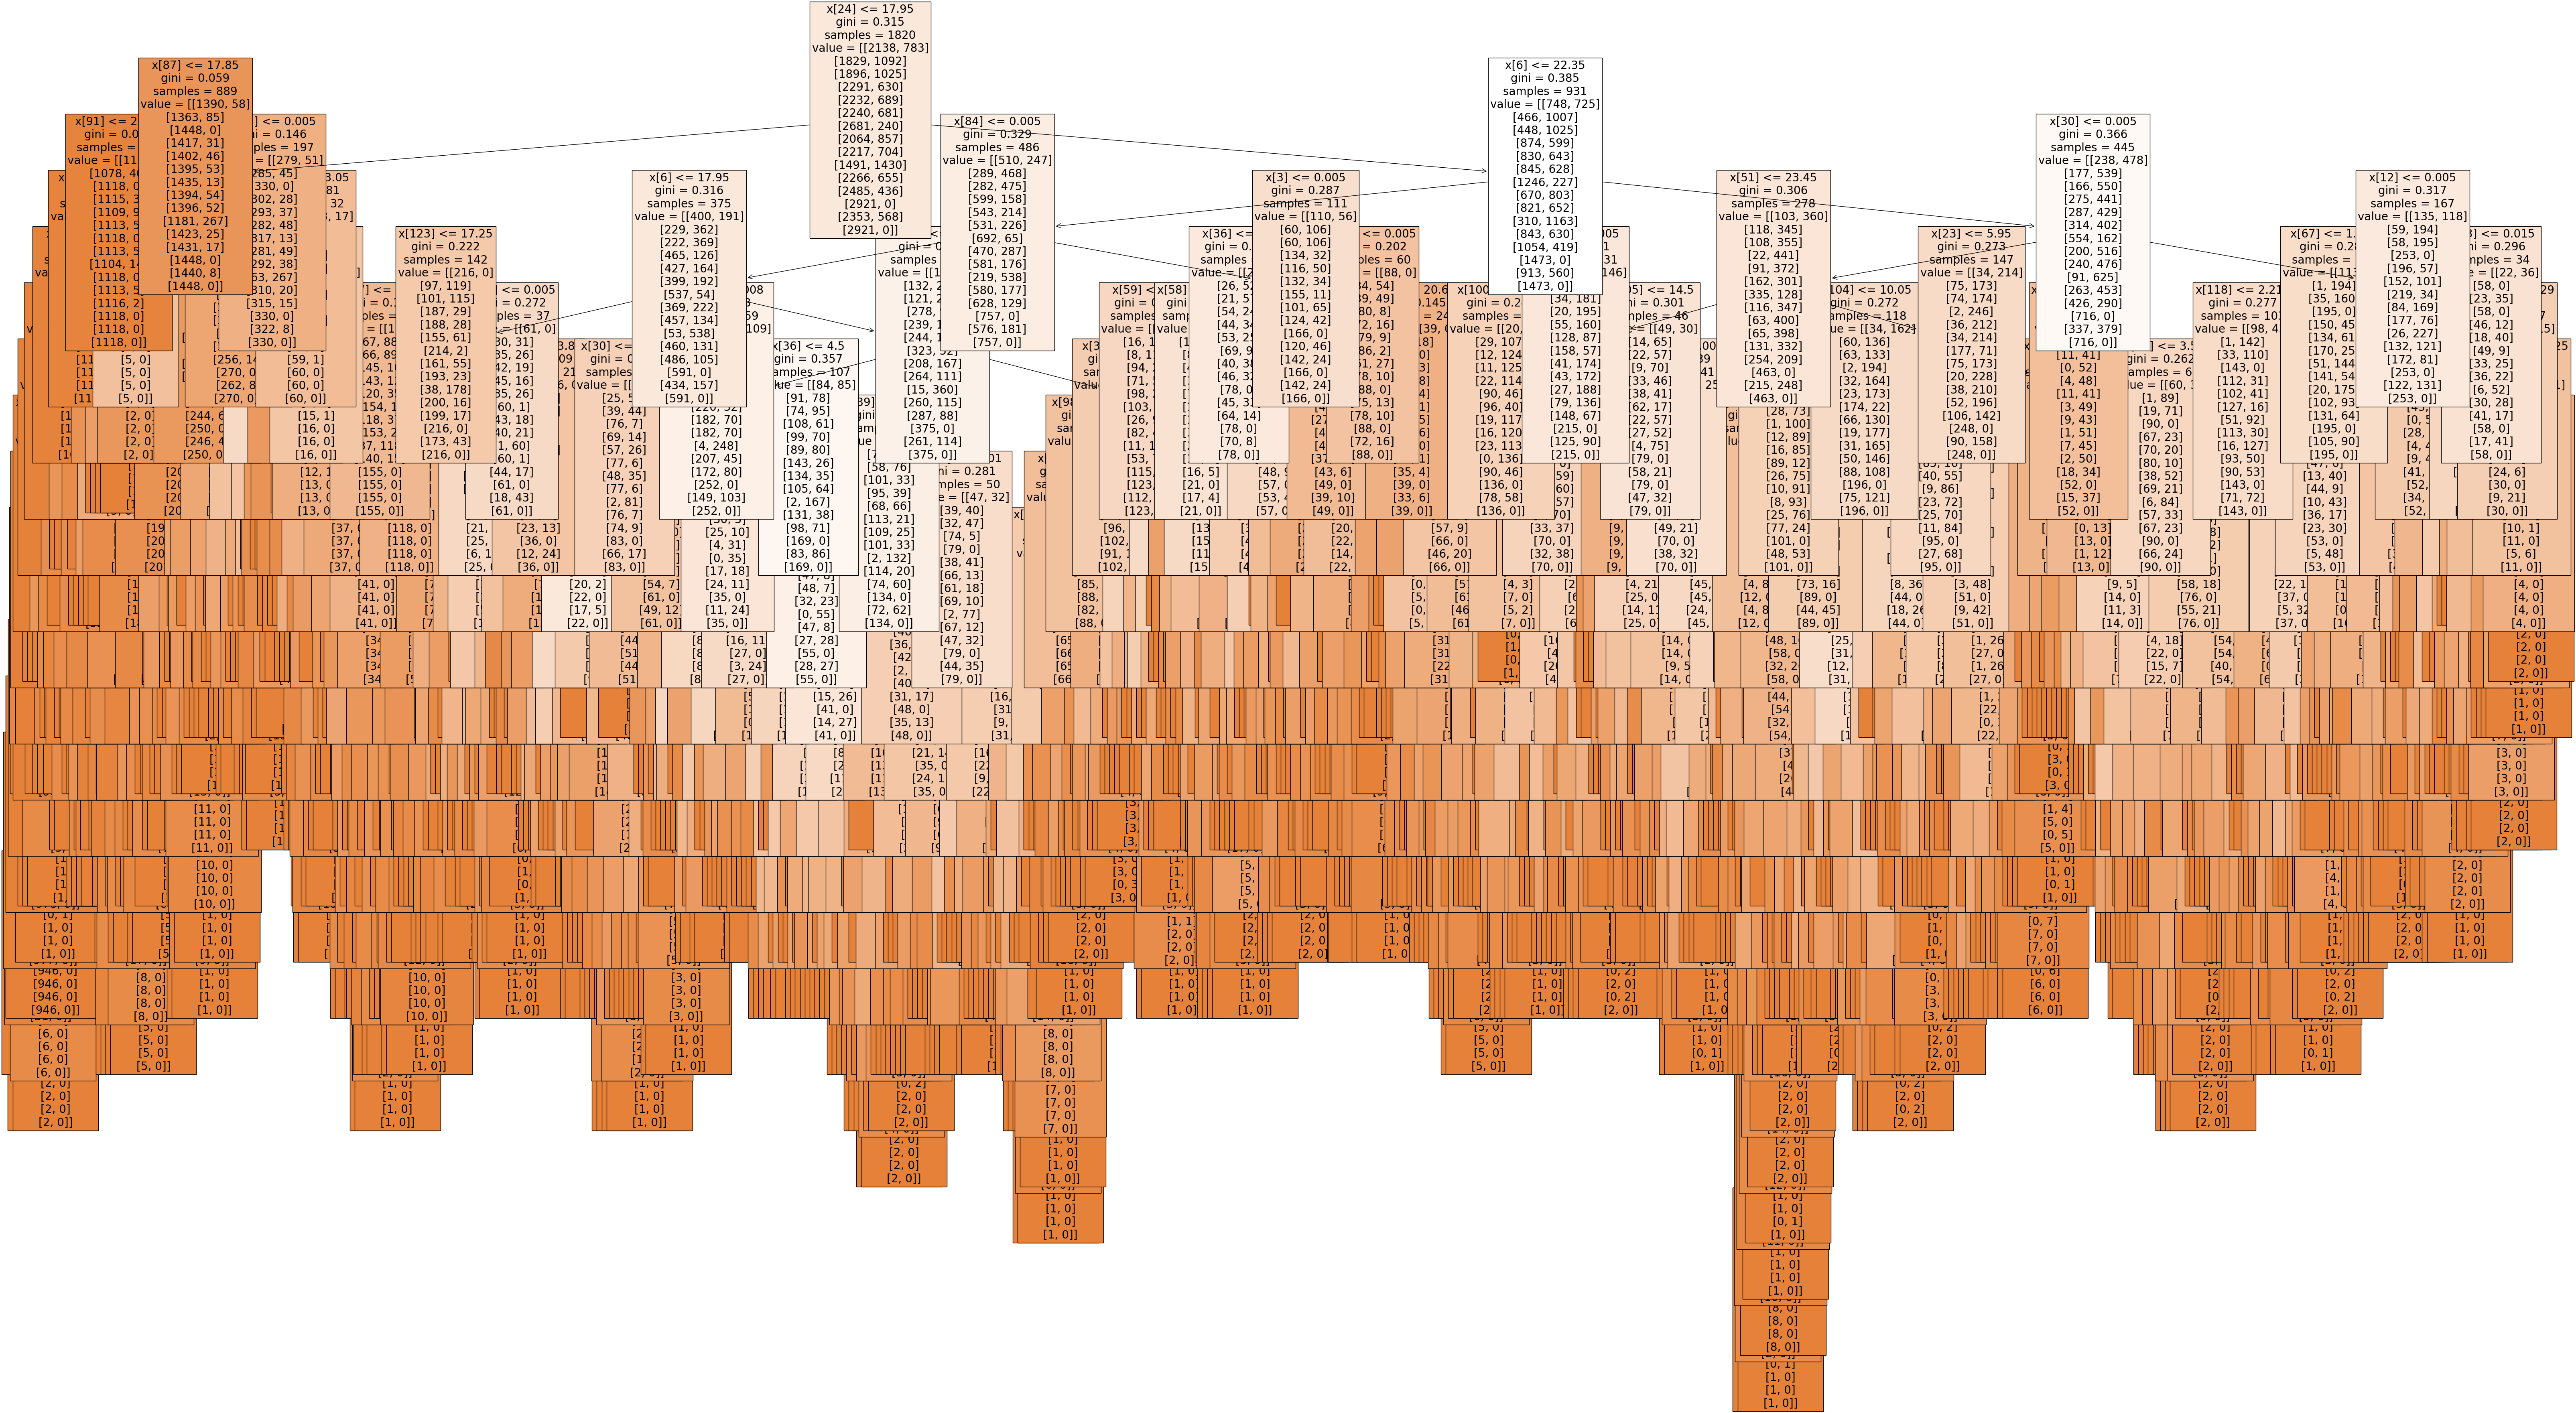

In [20]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=Weather_outcomes, filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

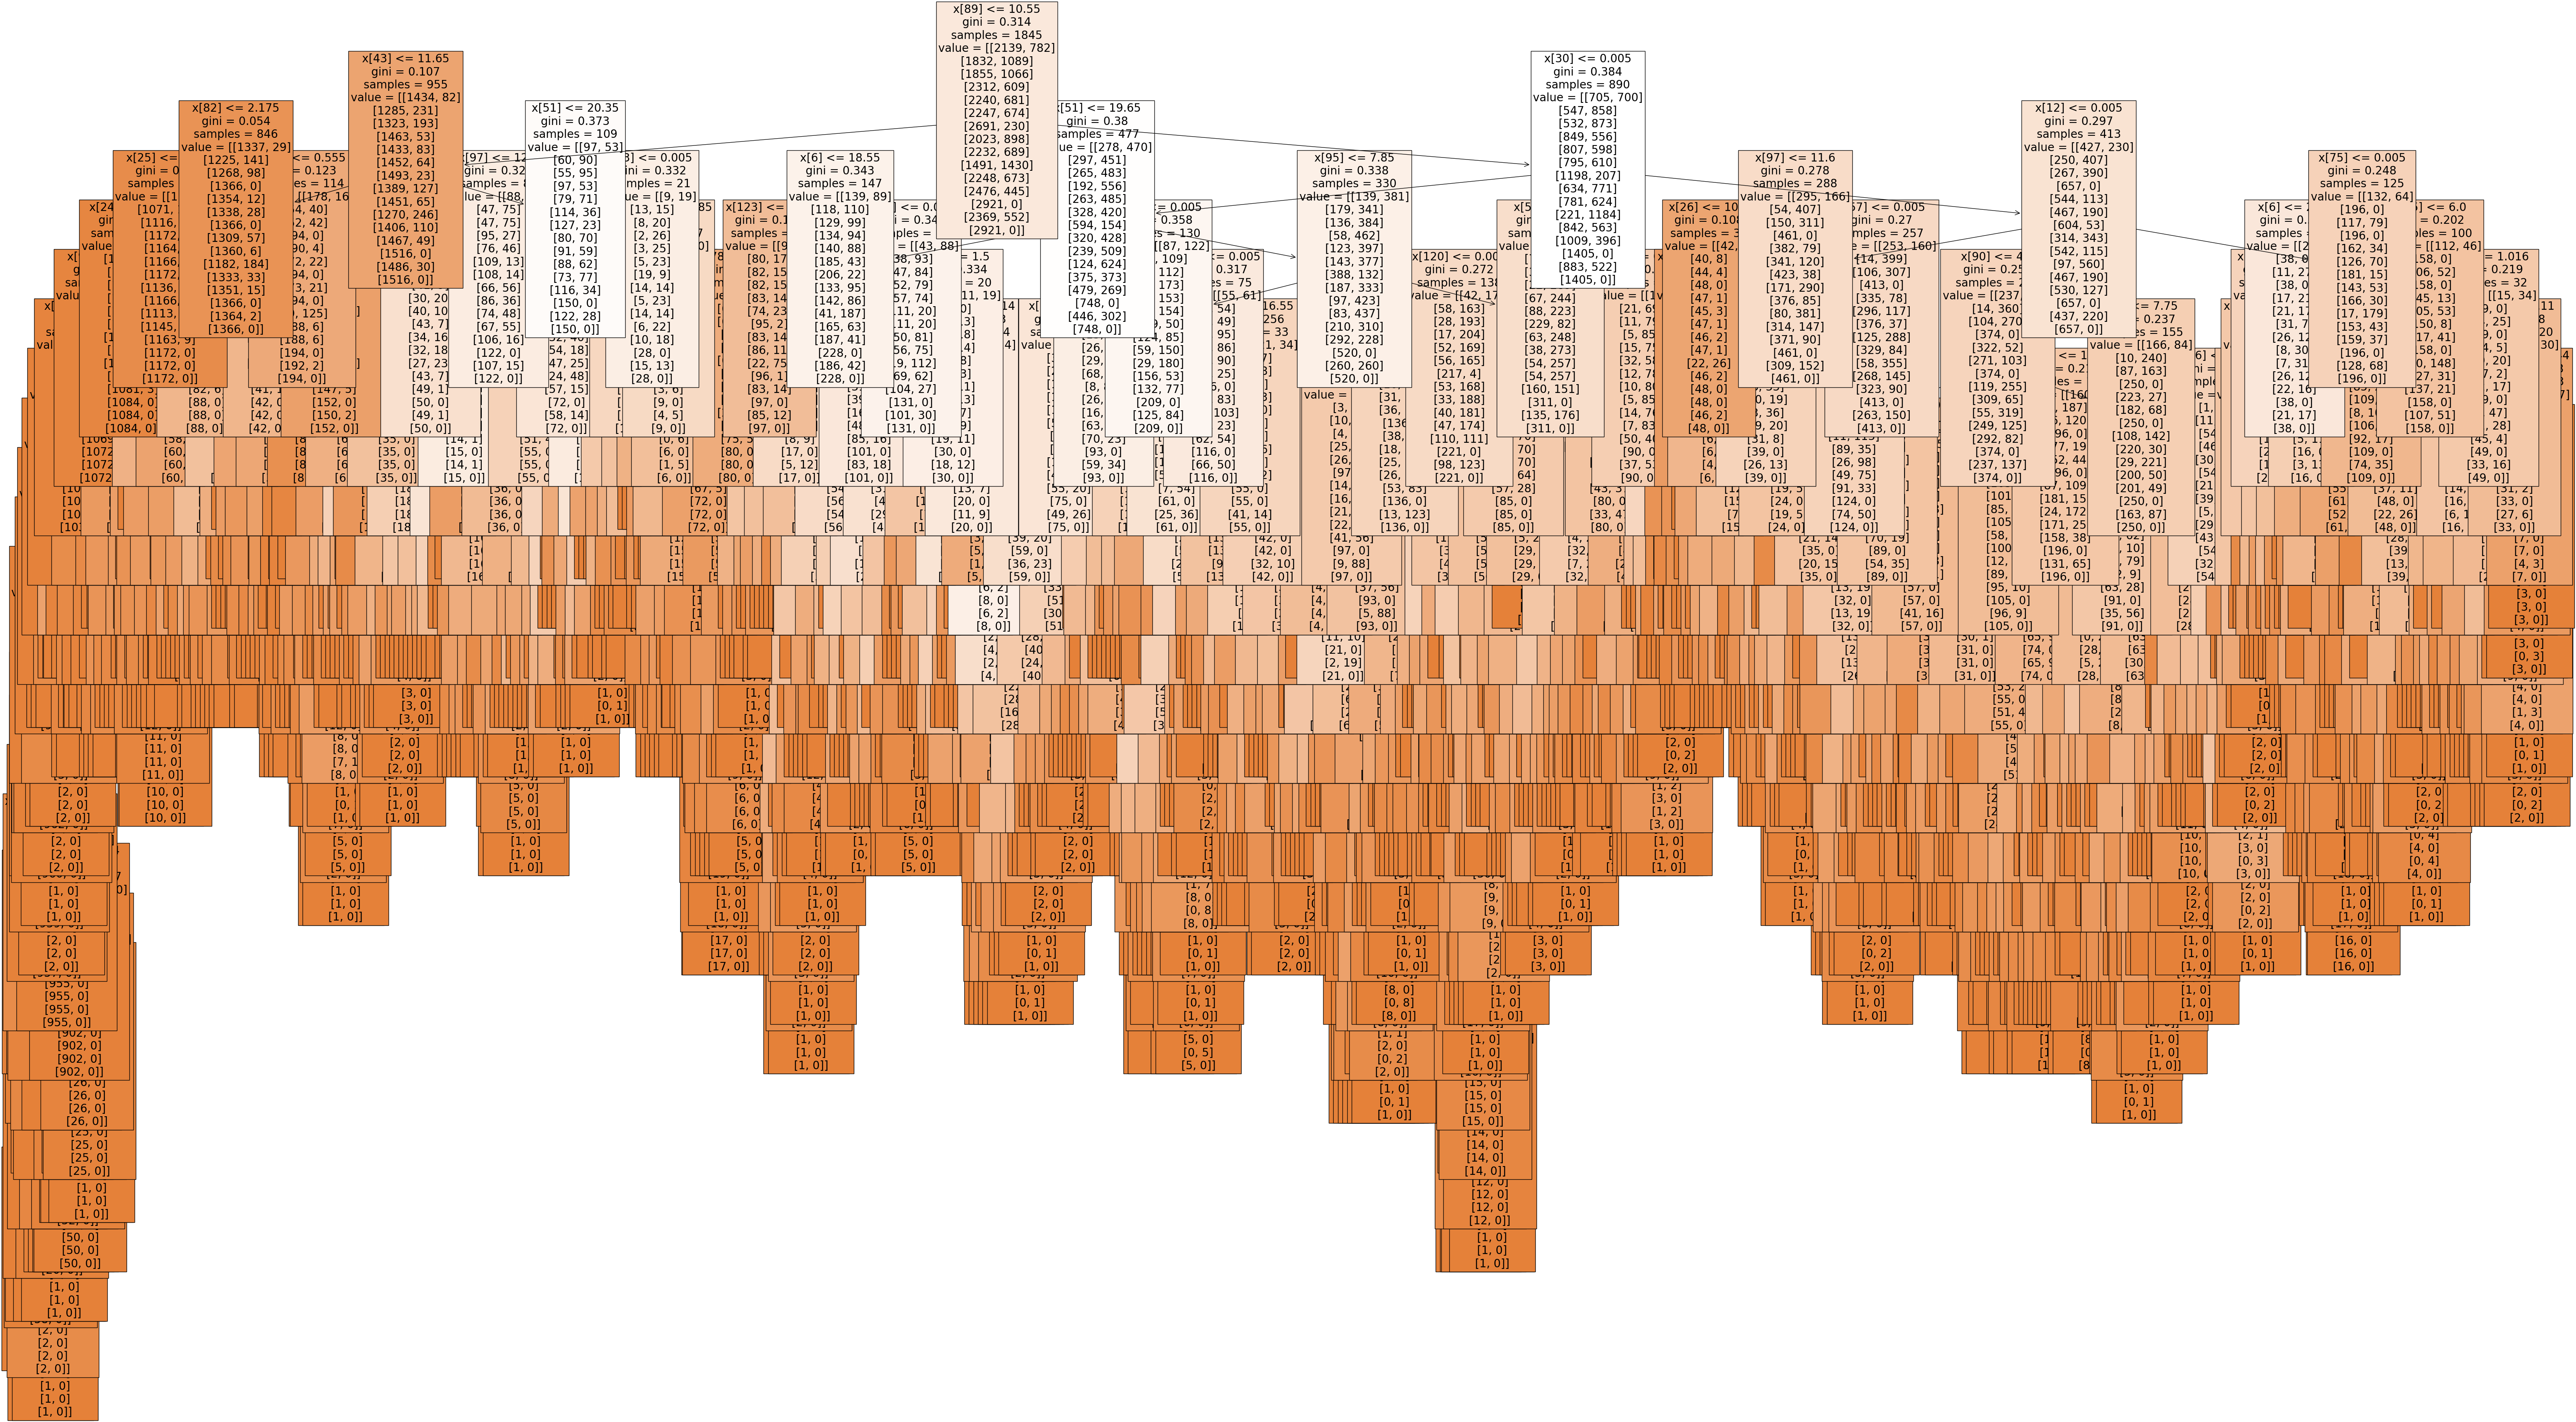

In [21]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[80], fontsize = 20, class_names=Weather_outcomes, filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4,

In [22]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([3.14271246e-03, 3.52538999e-03, 3.66555995e-03, 1.54626180e-02,
       3.56160894e-03, 1.35110462e-02, 3.40212556e-02, 2.32072188e-02,
       2.91815977e-03, 4.24790109e-03, 3.13994251e-03, 3.86167650e-03,
       1.73692386e-02, 4.29710938e-03, 3.31802618e-03, 1.13054317e-02,
       1.14985481e-02, 5.74080012e-03, 4.14398837e-04, 1.47270361e-03,
       0.00000000e+00, 1.53300494e-02, 0.00000000e+00, 1.37335871e-03,
       2.26883796e-02, 1.45797339e-02, 3.62561342e-03, 2.31943449e-03,
       4.65513532e-03, 3.41367552e-03, 1.62766948e-02, 4.94414555e-03,
       5.23087384e-03, 2.80477347e-02, 2.11071757e-02, 4.87562276e-03,
       2.25829270e-03, 3.37841570e-03, 3.11599035e-03, 2.26145104e-02,
       5.03280691e-03, 5.72470166e-03, 5.22868646e-02, 1.38260685e-02,
       4.81281408e-03, 2.98072425e-03, 4.24310911e-03, 3.77732843e-03,
       1.05752161e-02, 3.99552464e-03, 4.33316842e-03, 1.84323967e-02,
       1.00056547e-02, 3.34438574e-03, 3.38926108e-03, 2.45404801e-03,
      

In [23]:
np.set_printoptions(threshold=1000)

In [24]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.14271246e-03, 3.52538999e-03, 3.66555995e-03, 1.54626180e-02,
         3.56160894e-03, 1.35110462e-02, 3.40212556e-02, 2.32072188e-02,
         2.91815977e-03],
        [4.24790109e-03, 3.13994251e-03, 3.86167650e-03, 1.73692386e-02,
         4.29710938e-03, 3.31802618e-03, 1.13054317e-02, 1.14985481e-02,
         5.74080012e-03],
        [4.14398837e-04, 1.47270361e-03, 0.00000000e+00, 1.53300494e-02,
         0.00000000e+00, 1.37335871e-03, 2.26883796e-02, 1.45797339e-02,
         3.62561342e-03],
        [2.31943449e-03, 4.65513532e-03, 3.41367552e-03, 1.62766948e-02,
         4.94414555e-03, 5.23087384e-03, 2.80477347e-02, 2.11071757e-02,
         4.87562276e-03],
        [2.25829270e-03, 3.37841570e-03, 3.11599035e-03, 2.26145104e-02,
         5.03280691e-03, 5.72470166e-03, 5.22868646e-02, 1.38260685e-02,
         4.81281408e-03],
        [2.98072425e-03, 4.24310911e-03, 3.77732843e-03, 1.05752161e-02,
         3.99552464e-03, 4.33316842e-03, 1.84323967e-02, 1.00056547

In [25]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.10301557, 0.06477867, 0.05948424, 0.09087049, 0.11305046,
       0.06168751, 0.02853575, 0.0771992 , 0.09783557, 0.06655175,
       0.08694668, 0.05069918, 0.03754554, 0.05736641, 0.00443296])

In [26]:
important = pd.Series(sumarray, index = weather_stations) #.sort_values(ascending = False)
important

BASEL_         0.103016
BELGRADE_      0.064779
BUDAPEST_      0.059484
DEBILT_        0.090870
DUSSELDORF_    0.113050
HEATHROW_      0.061688
KASSEL_        0.028536
LJUBLJANA_     0.077199
MAASTRICHT_    0.097836
MADRID_        0.066552
MUNCHENB_      0.086947
OSLO_          0.050699
SONNBLICK_     0.037546
STOCKHOLM_     0.057366
VALENTIA_      0.004433
dtype: float64

['BASEL_', 'BELGRADE_', 'BUDAPEST_', 'DEBILT_', 'DUSSELDORF_', 'HEATHROW_', 'KASSEL_', 'LJUBLJANA_', 'MAASTRICHT_', 'MADRID_', 'MUNCHENB_', 'OSLO_', 'SONNBLICK_', 'STOCKHOLM_', 'VALENTIA_']


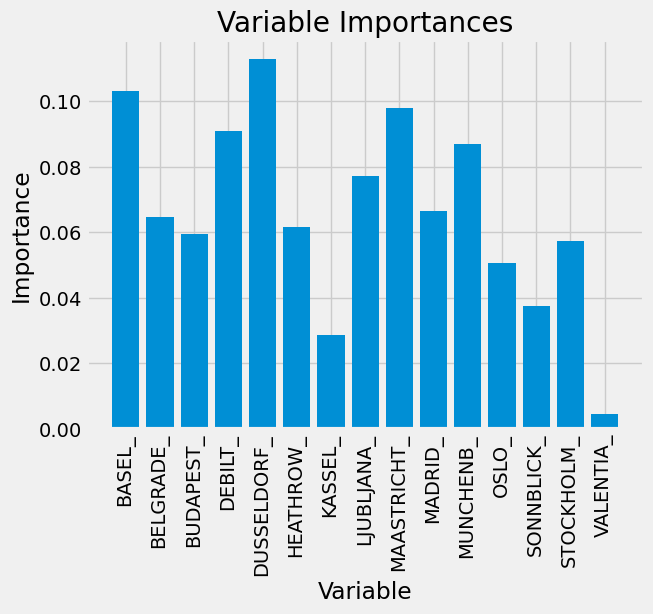

In [27]:
# Conduct variable importances by most influential weather station (broad analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(weather_stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, weather_stations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');